# MNIST Keras Example
Trains a simple deep NN on the MNIST dataset.

Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.

Taken and adpated from https://github.com/keras-team/keras/tree/master/examples

MNIST is a dataset of handwritten digits.

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

Using TensorFlow backend.


First we set a couple of parameters and download the data.

In [2]:
batch_size = 128
num_classes = 10
epochs = 20

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


Next let's take a look at an entry from the training set, the data some as a long vector of numbers representing greyscale pixel values. We'll reshape the data to 28 x 28 before looking at it.

<IPython.core.display.Javascript object>


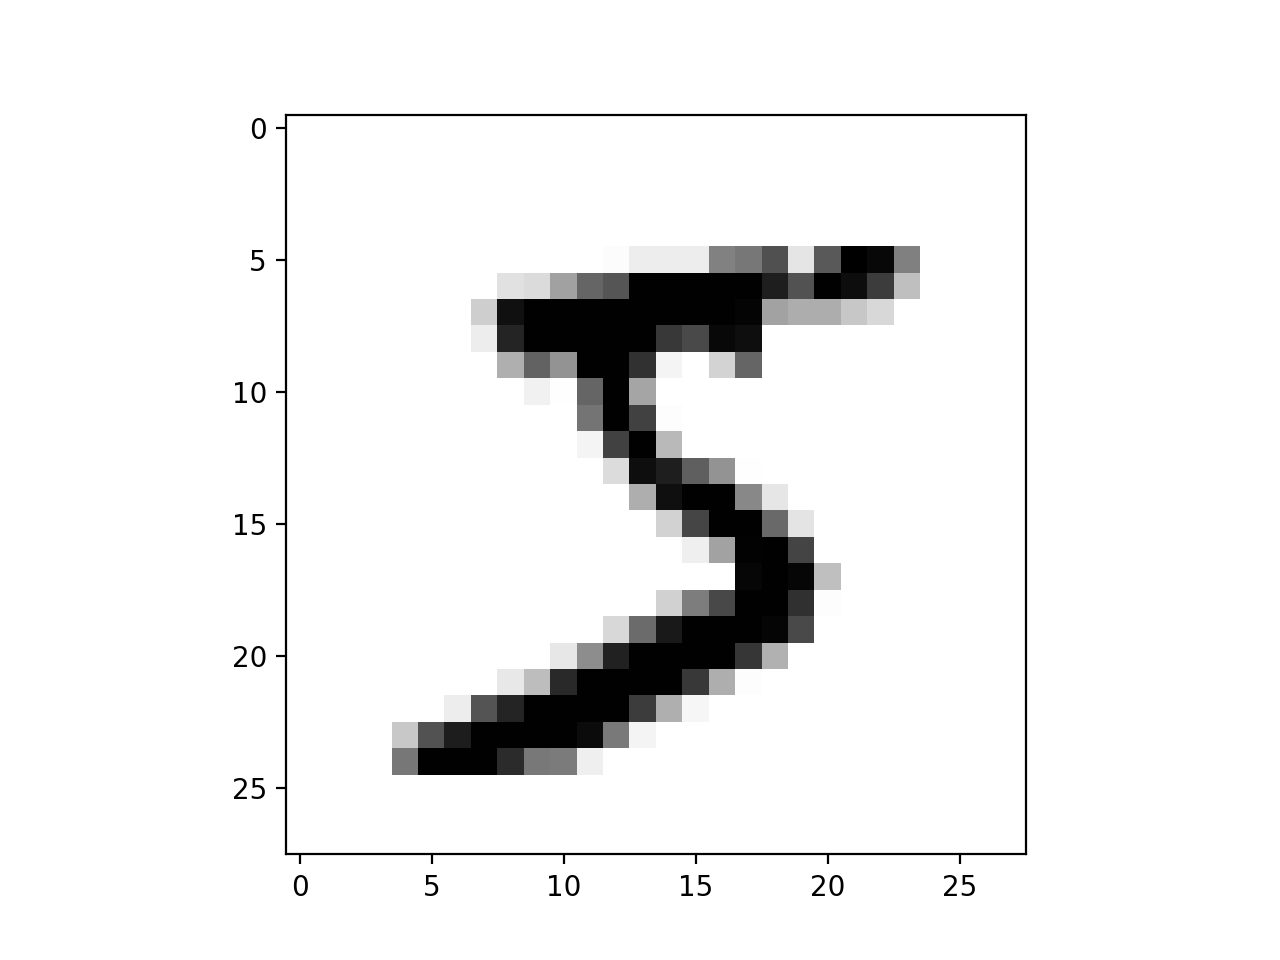

In [20]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.imshow(x_train[0].reshape(28, 28), cmap='binary')
plt.show()

It looks like the number "5", let's see what the corresponding label says.

In [19]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


The label is a vector (actually a Python list) who's values represent the digits 0 - 9, the 1. is in the 5th position (remember indexing starts at 0) so this label represents "5" as we expected. Next we'll massage the data into the format expected by the model we want to use, in this case we have 60000 images which are each represented by a vector that has 784 entries so we'll use a (60000, 784) array to store the data. For the Higgs kaggle challenge think about what shape the data should be in for your model.

In [3]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


Greyscale pixel values have values between 0 and 255. In the step above we divided all the values in our dataset by 255, which normalises them so that they are now between 0 and 1. Think about what consequences this has. For the Higgs challenge each element in your data vector will represent a different physical quantity each possibly measured in a different unit. Should we expect a model to know about the units? (the answer is often no!)


Below we instatiate a deep neural network model in keras. We are using the Dense layers and a technique called Dropout which helps to combat overtraining. You can read more about these features of keras in the documentation at https://keras.io/

In [4]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

W0724 12:56:51.474185 139636633966400 deprecation_wrapper.py:119] From /opt/conda/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0724 12:56:51.569481 139636633966400 deprecation_wrapper.py:119] From /opt/conda/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0724 12:56:51.587287 139636633966400 deprecation_wrapper.py:119] From /opt/conda/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0724 12:56:51.624061 139636633966400 deprecation_wrapper.py:119] From /opt/conda/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0724 12:56:51.693392 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.2467

You can see that the model trains and gets a nice score. Think about how long the model took to train. What do you think effects this time?

This model is not the best for the analysis of images, but it is more similar to the kind of model you might want to consider building for the Higgs challenge.